#**Unemployment Analysis during Covid-19 over the year 2020**

#**Data Science Intership Task 2 of Oasis Infobyte**

Name : Areesha Kaleem

Institute: University of Engineering and Technology, Lahore

In [46]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
#libraries for model trainig and predictions
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [49]:
#load dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\Data science Intership-Oasis Infobyte\Unemployment_Rate_upto_11_2020.csv',encoding = 'unicode_escape')

#**Data Preprocessing**

In [50]:
#(col,row)
df.shape

(267, 9)

In [51]:
#Dataset in Tabular form
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [52]:
#Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [53]:
pd.isnull(df).sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [54]:
#column names
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [55]:
#evaluating mean, median and other numerical parameters
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [56]:
#renaming the state and region column rightly 
df.rename(columns = {'Region' : 'State', 'Region.1' : 'Region'}, inplace = True)
df.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

#**Exploratory Data Analysis**

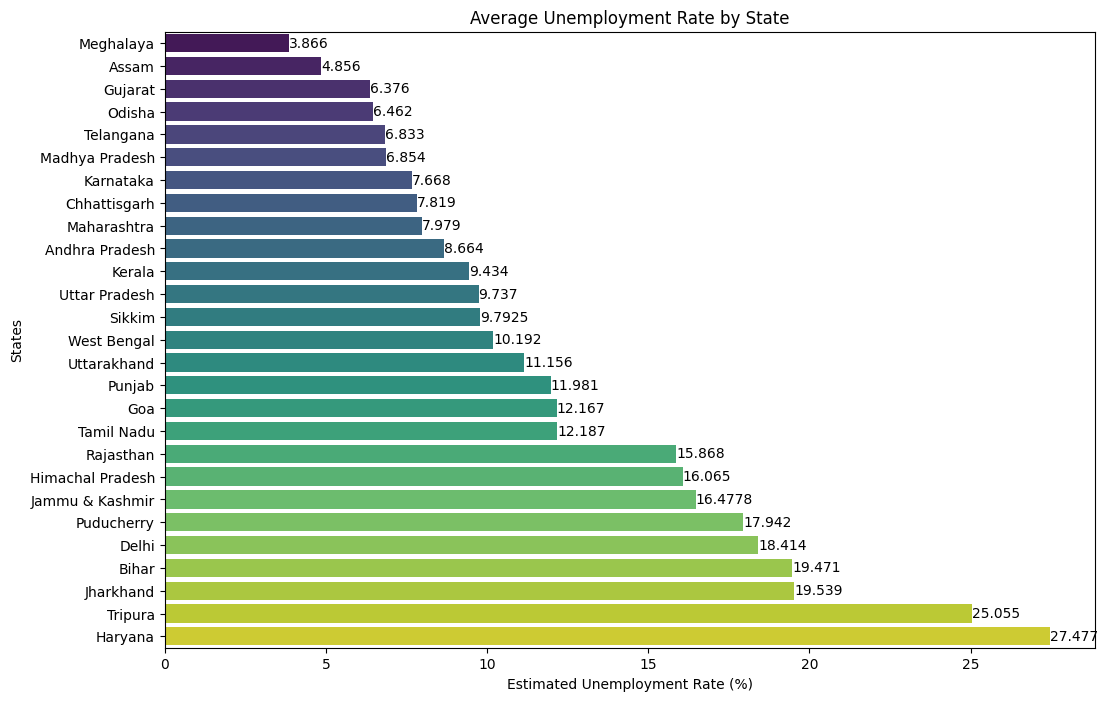

In [57]:
state_unemployment = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=' Estimated Unemployment Rate (%)', y='State', data=state_unemployment, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('States')
plt.title('Average Unemployment Rate by State')
plt.show()

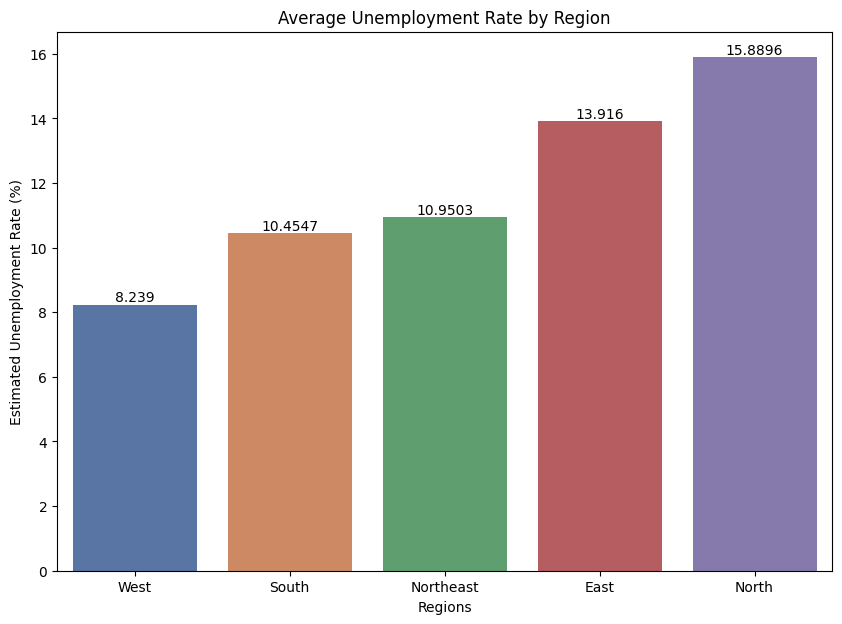

In [58]:
region_unemployment = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values().reset_index()
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=region_unemployment, palette='deep')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Regions')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.show()

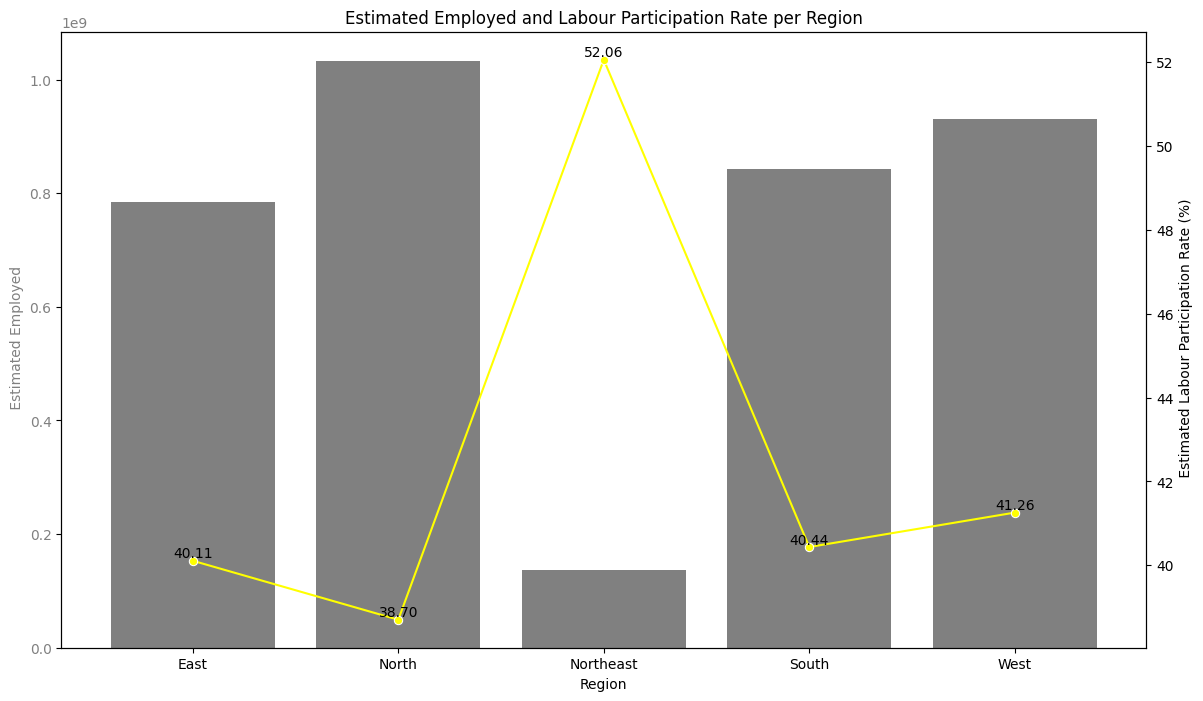

In [85]:
region_summary = df.groupby('Region').agg({
    ' Estimated Employed': 'sum',
    ' Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x='Region', y=' Estimated Employed', data=region_summary, ax=ax1, color='grey')
ax1.set_ylabel(' Estimated Employed', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()
sns.lineplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=region_summary, ax=ax2, color='yellow', marker='o')
for i in range(region_summary.shape[0]):
    ax2.text(i, region_summary[' Estimated Labour Participation Rate (%)'][i], 
             f"{region_summary[' Estimated Labour Participation Rate (%)'][i]:.2f}", 
             color='black', ha='center', va='bottom')
ax2.set_ylabel(' Estimated Labour Participation Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.title('Estimated Employed and Labour Participation Rate per Region')
plt.show()

#**Time Series Analysis**

In [61]:
#formatting date
df[' Date'] = pd.to_datetime(df[' Date'])
df.set_index(' Date', inplace=True)
monthly_unemployment = df[' Estimated Unemployment Rate (%)'].resample('M').mean()

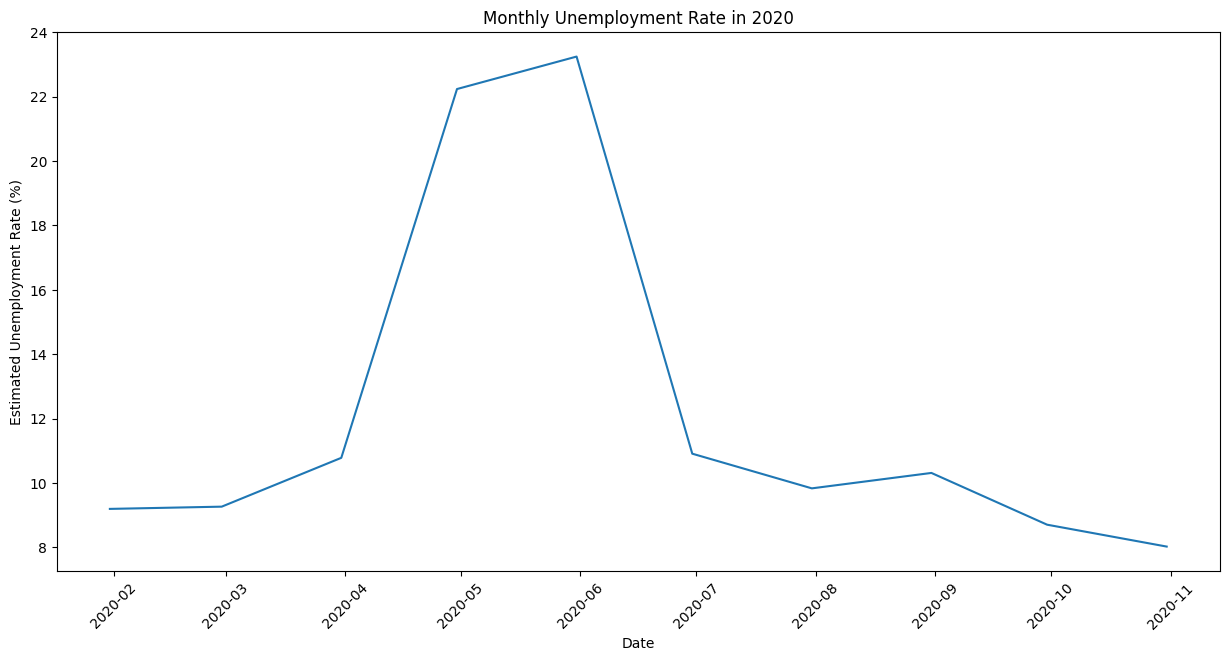

In [62]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=monthly_unemployment.index, y=monthly_unemployment.values)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Monthly Unemployment Rate in 2020')
plt.xticks(rotation=45)
plt.show()

#**Summary**